In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

In [3]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("Data loaded successfully.")
print(df.head())

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv
Data loaded successfully.
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [4]:
print(df.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [5]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [6]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [7]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,13,464,70,-0.514538,-0.751371,-0.493372
1,2,80,317,19,2439,1288,1.726436,1.739175,0.049906
2,0,80,1179,16,806,514,-0.514538,1.739175,-0.339444
3,3,80,757,16,2186,602,0.232453,-0.751371,-0.117917
4,3,80,716,13,806,239,-0.514538,-0.751371,-0.413286


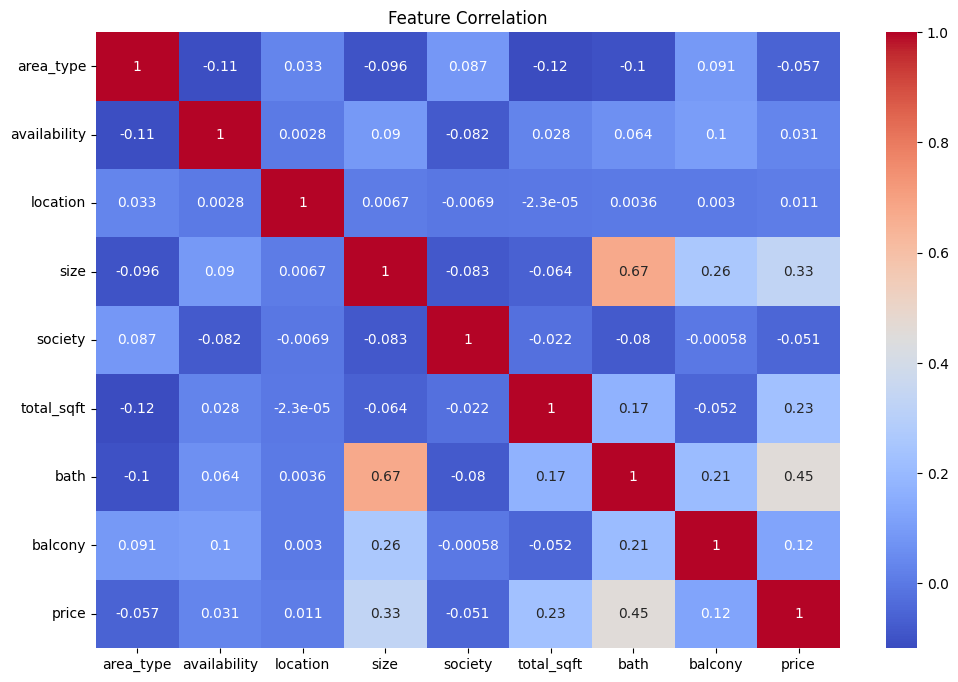

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [10]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [12]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [13]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
def evaluate(y_test, y_pred, name):
    print(f"\n{name} Performance:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R2:", r2_score(y_test, y_pred))

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")


Linear Regression Performance:
RMSE: 0.8598857574911429
MAE: 0.36980908698832776
R2: 0.22932785563399039

Decision Tree Performance:
RMSE: 1.0376985454218548
MAE: 0.3028649964839741
R2: -0.12235582905622899

Random Forest Performance:
RMSE: 0.7307837674957927
MAE: 0.22793247960904642
R2: 0.44337086471268916


In [16]:
import joblib

model = LinearRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'bengaluru_model.pkl')

['bengaluru_model.pkl']

In [17]:
from google.colab import files
files.download('bengaluru_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['location'])

LabelEncoder()

In [25]:
import pandas as pd

df = pd.read_csv('Bengaluru_House_Data.csv')

In [26]:
print(df['location'].head(10))
print(df['location'].dtype)


0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
5                  Whitefield
6            Old Airport Road
7                Rajaji Nagar
8                Marathahalli
9                Gandhi Bazar
Name: location, dtype: object
object


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['location'] = df['location'].astype(str)
le.fit(df['location'])


LabelEncoder()

In [28]:
print(le.classes_)


[' Anekal' ' Banaswadi' ' Basavangudi' ... 'vinayakanagar'
 'white field,kadugodi' 'whitefiled']


In [32]:
encoded_value = le.transform([' Anekal'])
print(encoded_value)


[0]
